<a href="https://colab.research.google.com/github/PranayNankani/portfolio_projects/blob/main/Global_energy_consumption_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Energy consumption analysis
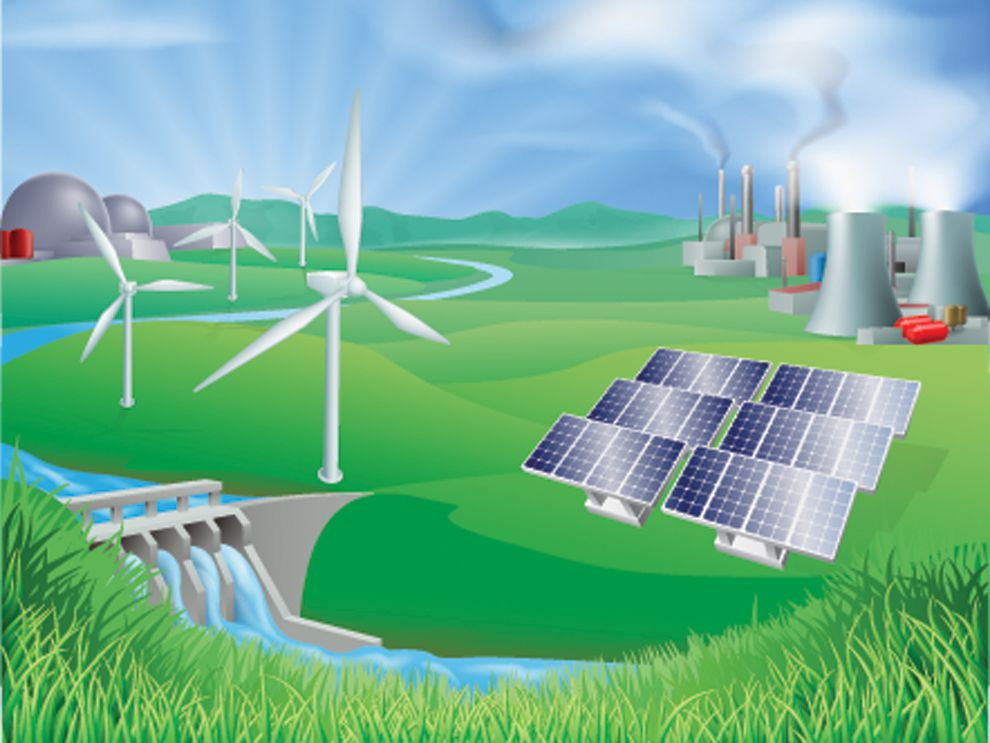


Global energy consumption has seen a huge increase over the last few years. With the rise in energy demands and depletion of non-renewable sources of energy, more and more countries are looking to shift to renewable sources of energy. 

In this project we will be analysing the energy consumption across the world and finding trends from the last decade. We would be using the **numpy, pandas, beautifulsoup, scipy, matplotlib and seaborn libraries in Python** for performing Data Analysis.

The data for analysis is obtained from 
[Our World in Data's](https://ourworldindata.org/energy) [Github repository](https://github.com/owid/energy-data). 
This dataset contains energy data from the last century however for the purpose of our analysis we would be considering data from 2010-2021. 

This project is part of my submission for the [Data Analysis with Python: Zero to Pandas](zerotopandas.com) course. 

## Downloading the Dataset

The energy dataset used in this project is downloaded from [Our World in Data's](https://ourworldindata.org/energy) [Github repository](https://github.com/owid/energy-data) and was **last accessed on 23rd December 2022**.


In [ ]:
!pip install jovian opendatasets --upgrade --quiet
from urllib.request import urlretrieve

     |████████████████████████████████| 68 kB 6.6 MB/s 


Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv' 

In [ ]:
urlretrieve(dataset_url, 'owid-energy-data.csv')

('owid-energy-data.csv', <http.client.HTTPMessage at 0x7f5fca30ef10>)

The dataset has been downloaded. 

Next we will be using the the pandas library to read the csv file. 

In [ ]:
!pip install pandas --upgrade --quiet

     |████████████████████████████████| 12.2 MB 29.3 MB/s 


In [ ]:
import pandas as pd

In [ ]:
energy_data_raw = pd.read_csv('owid-energy-data.csv')

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "pranaynankani-zerotopandas-course-project" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Data Preparation and Cleaning

The dataset has been loaded and data cleaning would be performed in this section. 

For the purpose of our analysis we would be considering data from 2010-2021 only and removing some unnecssary rows and columns.


In [ ]:
energy_data_raw.shape

(21861, 129)

In [ ]:
energy_data_raw.sample(10)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
18144,Spain,2007,ESP,45245784.0,1.498934e+12,-9.258,-0.180,39.066,1.768,64.094,...,0.172,0.078,18.333,11.662,77.952,609.339,27.57,1722.854,9.143,4.221
17617,South Africa,1953,ZAF,13933250.0,6.235516e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2831,Brazil,1926,BRA,31188942.0,4.020795e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9656,Ireland,1918,IRL,4303696.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20291,United Arab Emirates,1912,ARE,49770.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7582,Georgia,2007,GEO,3906476.0,4.000693e+10,NaN,NaN,NaN,NaN,0.000,...,0.000,NaN,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN
2893,Brazil,1988,BRA,145253984.0,1.200535e+12,5.942,3.929,482.328,70.060,NaN,...,0.000,0.000,NaN,0.000,0.000,0.000,0.00,0.000,0.000,0.000
10723,Liberia,2014,LBR,4519410.0,3.843632e+09,NaN,NaN,NaN,NaN,0.000,...,0.000,NaN,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN
6198,Eswatini,1951,SWZ,278573.0,1.767445e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19637,Turkey,1934,TUR,16121772.0,2.753329e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Filtering the data to include values only after 2010**

In [ ]:
energy_data_new=energy_data_raw[energy_data_raw.year >= 2010] # including data only from 2010 onwards

**Filtering the unncessary columns not relevant for our analysis**

In [ ]:
selected_columns=[
"country",
"year",
"population",
"gdp",
"biofuel_consumption",
"coal_consumption",
"energy_cons_change_pct",
"energy_per_capita",
"fossil_fuel_consumption",
"gas_consumption",
"hydro_consumption",
"low_carbon_consumption",
"nuclear_consumption",
"oil_consumption",
"other_renewable_consumption",
"primary_energy_consumption",
"renewables_consumption",
"renewables_share_energy",
"solar_consumption",
"wind_consumption",
]

In [ ]:
energy_data_new=energy_data_new[selected_columns].copy() # creating a copy of the original dataset with the filtered columns
energy_data_new.sample(10)

,country,year,population,gdp,biofuel_consumption,coal_consumption,energy_cons_change_pct,energy_per_capita,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,renewables_share_energy,solar_consumption,wind_consumption
15150,Oceania,2015,40403644.0,NaN,NaN,557.085,2.096,45831.645,1654.958,435.977,103.993,194.390,NaN,661.896,35.382,1851.766,194.390,10.498,16.783,38.232
2921,Brazil,2016,206859584.0,2.889037e+12,192.560,185.150,-2.221,16277.570,1860.395,370.879,1019.713,1506.776,40.754,1304.367,163.871,3367.171,1466.023,43.539,0.228,89.651
18735,Syria,2011,22730734.0,1.259456e+11,NaN,NaN,-9.477,11966.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272.005,NaN,NaN,NaN,NaN
4464,Colombia,2018,49276968.0,6.519006e+11,9.575,45.463,1.964,10550.795,353.542,127.299,149.884,166.369,0.000,180.780,6.764,519.911,166.369,32.000,0.032,0.115
10040,Jamaica,2016,2802699.0,1.894203e+10,NaN,NaN,3.485,13280.540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.221,NaN,NaN,NaN,NaN
5320,Democratic Republic of Congo,2021,95894120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3252,Burkina Faso,2019,20951638.0,NaN,NaN,NaN,0.726,918.218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.238,NaN,NaN,NaN,NaN
8157,Grenada,2010,114058.0,NaN,NaN,NaN,3.906,10297.715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.175,NaN,NaN,NaN,NaN
11722,Mauritania,2015,3946225.0,1.231613e+10,NaN,NaN,1.360,2908.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.479,NaN,NaN,NaN,NaN
4213,Chile,2011,17173568.0,3.386343e+11,NaN,66.986,8.684,23715.643,335.998,58.365,56.580,71.284,0.000,210.647,13.773,407.282,71.284,17.502,0.000,0.931


**We can see that there are a few continents and other grouped data in the country column. In the following code cells we would be handling these values.**

In [ ]:
energy_data_new['country'].nunique() # there are more countries in the dataset than that are present in the world

299

**We would be using the beautifulsoup library to scrape data from the web and then use that data to filter only the actual countries around the world**

In [ ]:
 !pip install bs4 --upgrade --quiet 

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
wikiurl="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-15"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code) #checking if we can legally scrape the data. 200 means it is alright to use the data.

200


In [ ]:
soup = BeautifulSoup(response.text, 'html.parser')
country_table=soup.find('table',{'class':"wikitable"})
df=pd.read_html(str(country_table)) # using pandas read_html function to read the country table
df

[    Country/Territory UN Region IMF[1][13]            World Bank[14]  \
     Country/Territory UN Region   Estimate       Year       Estimate   
 0               World         —  101560901       2022       96100091   
 1       United States  Americas   25035164       2022       22996100   
 2               China      Asia   18321197  [n 1]2022       17734063   
 3               Japan      Asia    4300621       2022        4937422   
 4             Germany    Europe    4031149       2022        4223116   
 ..                ...       ...        ...        ...            ...   
 212             Palau   Oceania        226       2022            258   
 213          Kiribati   Oceania        207       2022            181   
 214             Nauru   Oceania        134       2022            133   
 215        Montserrat  Americas          —          —              —   
 216            Tuvalu   Oceania         64       2022             63   
 
                United Nations[15]             
 

In [ ]:
# The data is in the form of a list. We would be converting it into a dataframe
df=pd.DataFrame(df[0]) # the 0th elemt contains the table
country_df=df['Country/Territory'][1:] # skipping the world row
country_list=country_df['Country/Territory'].tolist() #converting to list of countries
country_list[:10]

['United States',
 'China',
 'Japan',
 'Germany',
 'India',
 'United Kingdom',
 'France',
 'Canada',
 'Russia',
 'Italy']

**Next we will be filtering the dataset based on the countries obtained from the above list**

In [ ]:
country_filter = energy_data_new['country'].isin(country_list) # the function will return true if the country is found in the list
country_filter

110      True
111      True
112      True
113      True
114      True
         ... 
21856    True
21857    True
21858    True
21859    True
21860    True
Name: country, Length: 3450, dtype: bool

In [ ]:
energy_data_df=energy_data_new[country_filter]
energy_data_df.country.nunique()

199

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Exploratory Analysis and Visualization

In this section we will be performing some exploratory data analysis and visualisation. The following tasks have been performed in this section:
- Energy consumption change over the years. 
- Renewable energy consumption change over the years.
- Nuclear energy consumption change over the years.
- Realtionship between energy consumption and GDP/population

We will see if you can find some interesting trends and explore them in the following section. 

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Exploring the statistics for all columns in the table.

In [ ]:
energy_data_df.describe()

,year,population,gdp,biofuel_consumption,coal_consumption,energy_cons_change_pct,energy_per_capita,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,renewables_share_energy,solar_consumption,wind_consumption
count,2380.000000,2.380000e+03,1.449000e+03,288.000000,923.000000,2123.000000,2144.000000,920.000000,933.000000,929.000000,929.000000,836.000000,936.000000,936.000000,2144.000000,929.000000,929.000000,936.000000,936.000000
mean,2015.491176,3.700557e+07,6.322002e+11,36.229264,560.815425,2.507636,27595.871126,1633.936891,446.180763,125.049055,291.400410,96.770480,613.184411,21.343546,852.390572,204.345899,13.237562,13.134059,33.102931
std,3.445658,1.410638e+08,1.966827e+12,80.922112,2625.887117,9.087862,34841.222601,4377.719043,1013.357966,372.031942,772.065594,300.887664,1373.438478,49.035666,3464.162625,574.049589,15.130624,54.824863,121.627784
min,2010.000000,4.381000e+03,6.400989e+08,1.026000,0.000000,-46.011000,0.000000,7.313000,0.000000,0.000000,0.000000,0.000000,7.313000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.750000,1.588849e+06,2.747471e+10,5.172750,8.316000,-1.586000,4417.285250,177.904000,40.603000,1.535000,9.746000,0.000000,88.839750,0.192500,12.840750,9.086000,2.927000,0.022000,0.016000
50%,2015.000000,7.428112e+06,9.508178e+10,11.276500,37.763000,1.909000,16968.651000,462.404000,169.606000,18.364000,61.328000,0.000000,180.625000,2.417500,73.730500,45.532000,7.976000,0.455000,1.830000
75%,2018.000000,2.548219e+07,4.200474e+11,23.708500,187.878500,5.863500,34915.427000,1299.213000,445.286000,84.082000,169.818000,41.470000,572.649250,19.753750,420.134000,133.164000,19.027000,4.373500,16.994750
max,2021.000000,1.425894e+09,1.815162e+13,415.870000,23936.059000,72.036000,245265.891000,36222.586000,8506.917000,3471.190000,7568.308000,2262.428000,10299.730000,542.367000,43790.895000,6545.095000,86.875000,855.653000,1715.493000


**Observing how primary energy consumption has changed over the years**





In [ ]:
energy_yearwise=energy_data_df.groupby('year')[['primary_energy_consumption']].sum() # all the data for one year has been consolidated and the sum of the primary energy consumption has been taken
energy_yearwise

,primary_energy_consumption
year,
2010,140765.445
2011,144196.920
2012,146264.579
2013,148943.744
2014,150623.612
2015,151792.884
2016,153984.969
2017,156839.774
2018,161193.032


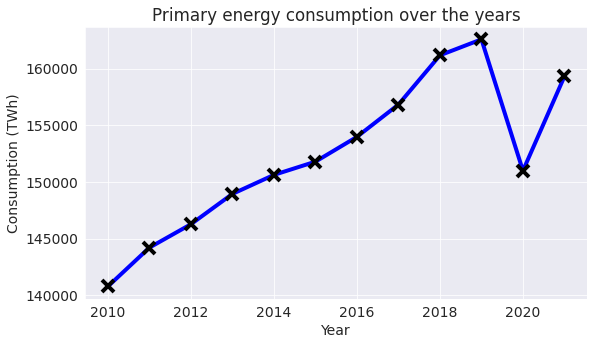

In [ ]:
#Plotting the data using a line graph
plt.plot(energy_yearwise.index, energy_yearwise['primary_energy_consumption'], 'b-x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='black')
# Title
plt.title('Primary energy consumption over the years')
# Axis labels
plt.xlabel('Year'); plt.ylabel('Consumption (TWh)');

- We can see an increasing trend of energy consumption but there is a dip in 2020 and again or rise in 2021.

**Observing how Renewable energy consumption has changed over the years**

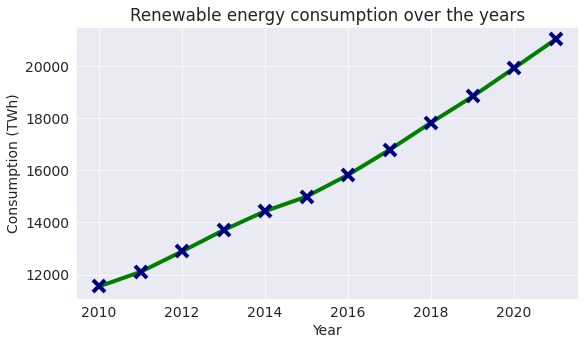

In [ ]:
ren_energy_yearwise=energy_data_df.groupby('year')[['renewables_consumption']].sum()
# Plot
plt.plot(ren_energy_yearwise.index, ren_energy_yearwise['renewables_consumption'], 'g-x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')
# Title
plt.title('Renewable energy consumption over the years')
# Axis labels
plt.xlabel('Year'); plt.ylabel('Consumption (TWh)');

- There is a steady increase in the consumption of renewable energy over the years. 

**Observing how Nuclear energy consumption has changed over the years**

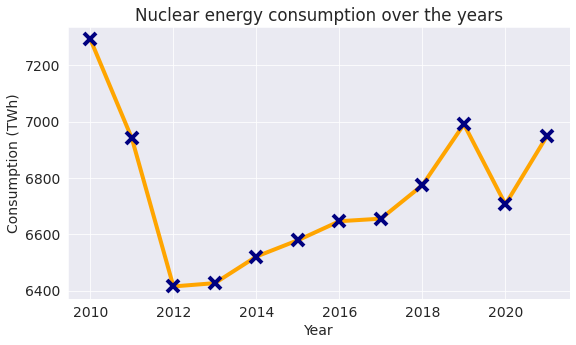

In [ ]:
nuc_energy_yearwise=energy_data_df.groupby('year')[['nuclear_consumption']].sum()
# Plot
plt.plot(nuc_energy_yearwise.index, nuc_energy_yearwise['nuclear_consumption'], color='orange',marker='x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')
# Title
plt.title('Nuclear energy consumption over the years')
# Axis labels
plt.xlabel('Year'); plt.ylabel('Consumption (TWh)');

- There is a sharp decrease in the consumption of renewable energy from 2011-2013. However there is a gradual increase and dip is seen again in 2020. 

**Ploting a stacked barplot with primary energy consumption and renewable energy consumption**

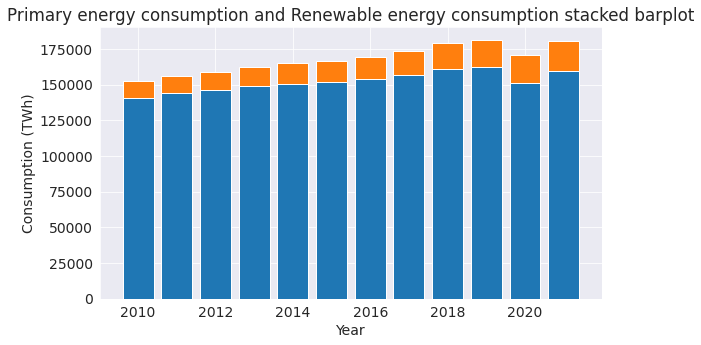

In [ ]:
# Stacked bar plot
plt.bar(energy_yearwise.index, energy_yearwise['primary_energy_consumption'])
plt.bar(ren_energy_yearwise.index, ren_energy_yearwise['renewables_consumption'], bottom=energy_yearwise['primary_energy_consumption'])
# Title
plt.title('Primary energy consumption and Renewable energy consumption stacked barplot')
# Axis labels
plt.xlabel('Year'); plt.ylabel('Consumption (TWh)');

- We can see a gradual increase in the contibution of renewable energy to the overall energy consumption. 

**Using a scatterplot to see if there is any relation between energy consumption and GDP/population**

In [ ]:
energy_data_df[['primary_energy_consumption','gdp','population']].describe()

,primary_energy_consumption,gdp,population
count,2144.000000,1.449000e+03,2.380000e+03
mean,852.390572,6.322002e+11,3.700557e+07
std,3464.162625,1.966827e+12,1.410638e+08
min,0.000000,6.400989e+08,4.381000e+03
25%,12.840750,2.747471e+10,1.588849e+06
50%,73.730500,9.508178e+10,7.428112e+06
75%,420.134000,4.200474e+11,2.548219e+07
max,43790.895000,1.815162e+13,1.425894e+09


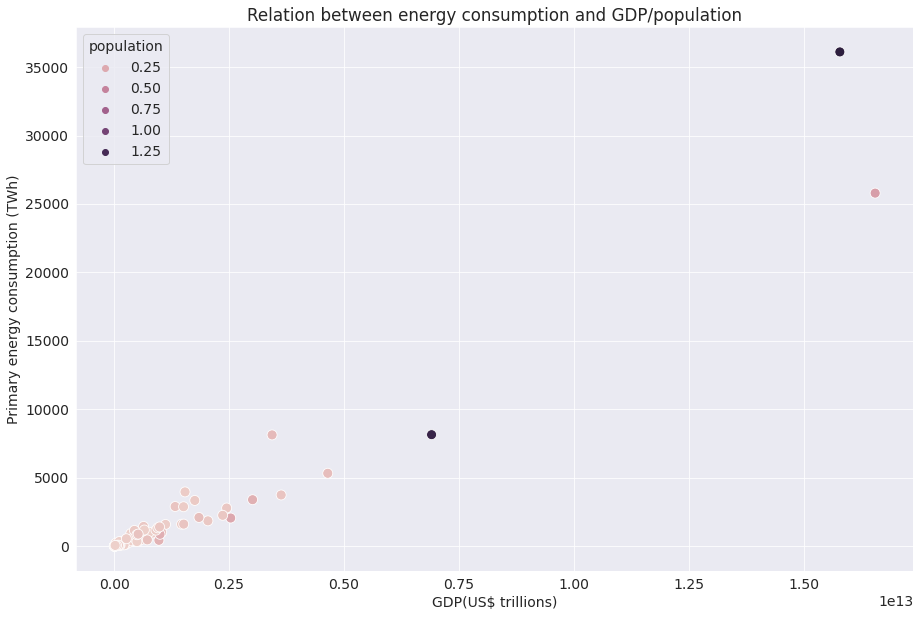

In [ ]:
energy_grouped=energy_data_df.groupby('country')[['primary_energy_consumption','gdp','population']].mean() #finding the avg 'primary_energy_consumption','gdp' and'population' for each country
energy_grouped.dropna(inplace=True)
plt.figure(figsize=(15, 10)) # Changing figure size
sns.scatterplot(x=energy_grouped.gdp, # X-axis
                y=energy_grouped.primary_energy_consumption,  # Y-axis
                hue=energy_grouped.population,  # Dot color
                s=100) # Size of point;
# Chart title and label
plt.title("Relation between energy consumption and GDP/population")
plt.xlabel('GDP(US$ trillions)'); plt.ylabel('Primary energy consumption (TWh)');

- A big difference in the mean(avg) energy consumption and 50%(median) energy consumption is noticed in the table. The scatterplot also has a few outlier values

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Asking and Answering Questions

**In this section we will be asking some questions based on our exploratory data analysis and trying to find answers to those questions using the data**



#### Q1: Which are the top 10 countries with highest energy consumption? What are the main sources of their energy consumption?


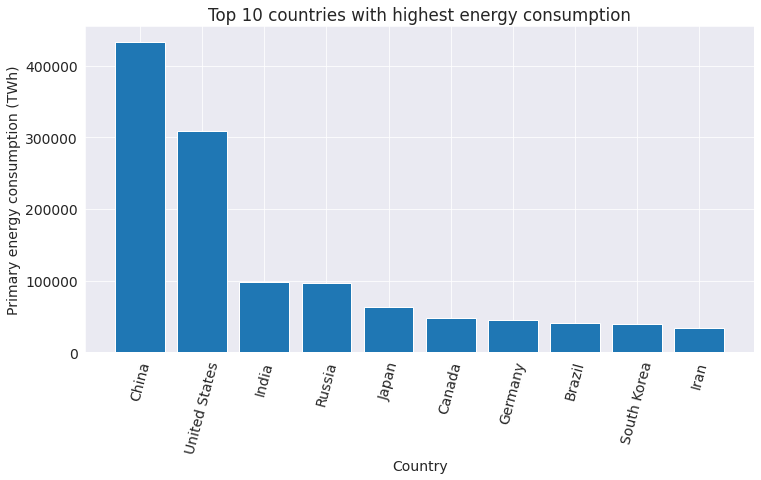

In [ ]:
energy_top10=energy_data_df.groupby('country')[['primary_energy_consumption']].sum().sort_values('primary_energy_consumption', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.xlabel('Country')
plt.ylabel('Primary energy consumption (TWh)')
plt.title("Top 10 countries with highest energy consumption")
plt.xticks(rotation=75)
plt.bar(energy_top10.index,energy_top10['primary_energy_consumption']);

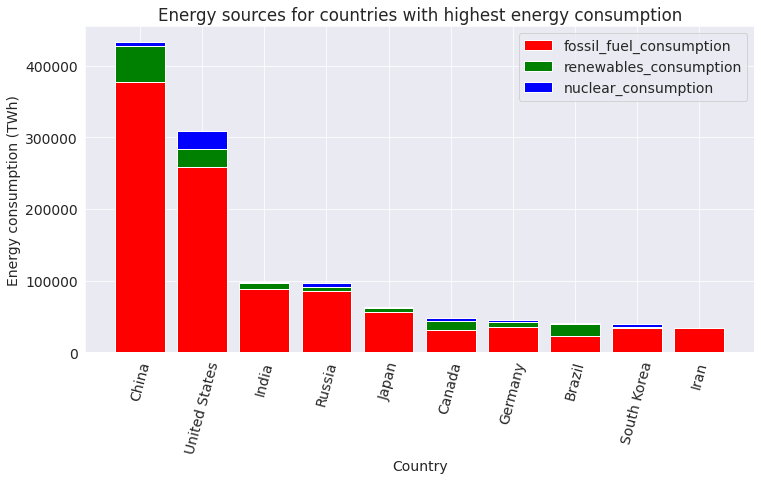

In [ ]:
energy_top10_sources=energy_data_df.groupby('country')[['primary_energy_consumption','fossil_fuel_consumption','renewables_consumption','nuclear_consumption']].sum().sort_values('primary_energy_consumption', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.bar(energy_top10_sources.index, energy_top10_sources['fossil_fuel_consumption'], color='r')
plt.bar(energy_top10_sources.index, energy_top10_sources['renewables_consumption'], bottom=energy_top10_sources['fossil_fuel_consumption'], color='g')
plt.bar(energy_top10_sources.index, energy_top10_sources['nuclear_consumption'], bottom=energy_top10_sources['fossil_fuel_consumption']+energy_top10_sources['renewables_consumption'], color='b')

plt.xlabel("Country")
plt.ylabel("Energy consumption (TWh)")
plt.legend(["fossil_fuel_consumption", "renewables_consumption", "nuclear_consumption"])
plt.title("Energy sources for countries with highest energy consumption");

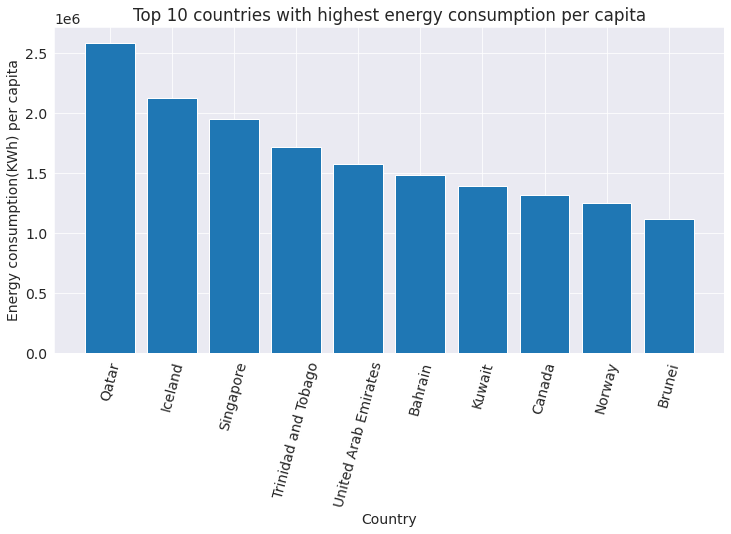

In [ ]:
energy_top10_percapita=energy_data_df.groupby('country')[['energy_per_capita']].sum().sort_values('energy_per_capita', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.xlabel('Country')
plt.ylabel('Energy consumption(KWh) per capita')
plt.title("Top 10 countries with highest energy consumption per capita")
plt.xticks(rotation=75)
plt.bar(energy_top10_percapita.index,energy_top10_percapita['energy_per_capita']);

- Fossil fuels account for a major portion of the enrergy consumption in countries across the world.
- Interestingly countries consuming the most energy are not the ones consuming the most energy per capita. 

#### Q2: Which are the top 10 countries with highest renewable energy consumption? Which country has seen the highest growth in the last five years? Which renwable sources provide the most energy worldwide? 


**Highest consumption (absolute value)**

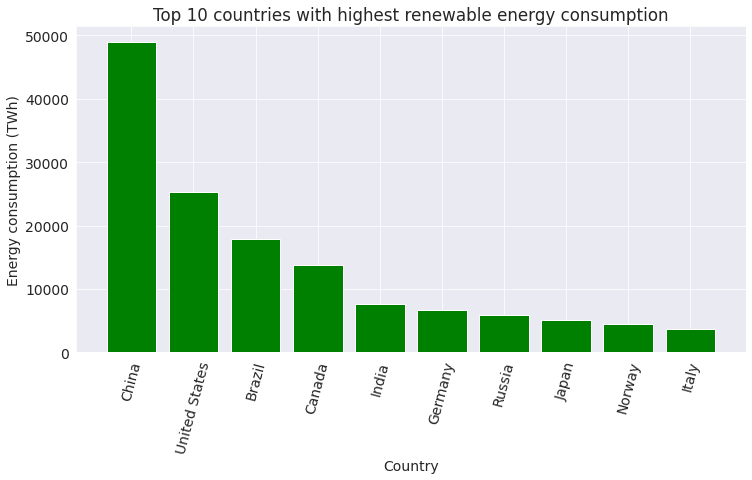

In [ ]:
ren_energy_top10=energy_data_df.groupby('country')[['renewables_consumption']].sum().sort_values('renewables_consumption', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.title("Top 10 countries with highest renewable energy consumption")
plt.xlabel("Country")
plt.ylabel("Energy consumption (TWh)")
plt.xticks(rotation=75)
plt.bar(ren_energy_top10.index, ren_energy_top10['renewables_consumption'],color='green');

**Highest consumption (in terms of percentage of total energy consumption)** 

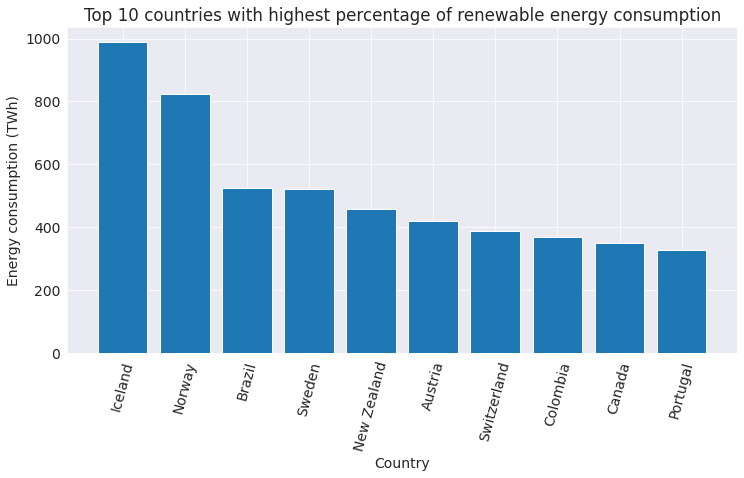

In [ ]:
ren_share_energy_top10=energy_data_df.groupby('country')[['renewables_share_energy']].sum().sort_values('renewables_share_energy', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Top 10 countries with highest percentage of renewable energy consumption")
plt.xlabel("Country")
plt.ylabel("Energy consumption (TWh)")
plt.bar(ren_share_energy_top10.index, ren_share_energy_top10['renewables_share_energy']);

**Countries with highest % growth in last 5 years**

In [ ]:
ren_energy_data_2016=energy_data_df[['renewables_consumption','country']][energy_data_df.year == 2016].set_index('country')
ren_energy_data_2016.rename(columns={"renewables_consumption": "renewables_consumption_2016"},inplace=True) #renaming column

ren_energy_data_2021=energy_data_df[['renewables_consumption','country']][energy_data_df.year == 2021].set_index('country')
ren_energy_data_2021.rename(columns={"renewables_consumption": "renewables_consumption_2021"},inplace=True)

ren_energy_diff=ren_energy_data_2021.merge(ren_energy_data_2016,how='inner',on='country')#merging dataframes
ren_energy_diff['difference']=(ren_energy_diff['renewables_consumption_2021']-ren_energy_diff['renewables_consumption_2016'])#adding column based on calculation
ren_energy_diff

,renewables_consumption_2021,renewables_consumption_2016,difference
country,,,
Afghanistan,NaN,NaN,NaN
Algeria,1.789,0.900,0.889
American Samoa,NaN,NaN,NaN
Angola,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN
...,...,...,...
Venezuela,160.458,168.271,-7.813
Vietnam,272.800,172.547,100.253
Yemen,NaN,NaN,NaN


In [ ]:
ren_energy_diff['perc_difference']=ren_energy_diff['difference']/ren_energy_diff['renewables_consumption_2016']*100.0

In [ ]:
ren_energy_diff=ren_energy_diff[ren_energy_diff.difference>10] #filtering to only allow a difference greater than 10 TWh
ren_energy_diff.sort_values(by='perc_difference',ascending=False).head(10)

,renewables_consumption_2021,renewables_consumption_2016,difference,perc_difference
country,,,,
Israel,14.990,4.945,10.045,203.134479
Netherlands,119.426,46.843,72.583,154.949512
Ukraine,56.513,24.850,31.663,127.416499
Indonesia,239.729,107.639,132.090,122.715744
South Africa,47.138,24.017,23.121,96.269309
South Korea,130.121,69.508,60.613,87.202912
Sri Lanka,22.734,12.703,10.031,78.965599
Australia,205.500,115.454,90.046,77.992967
Malaysia,93.828,56.861,36.967,65.012926


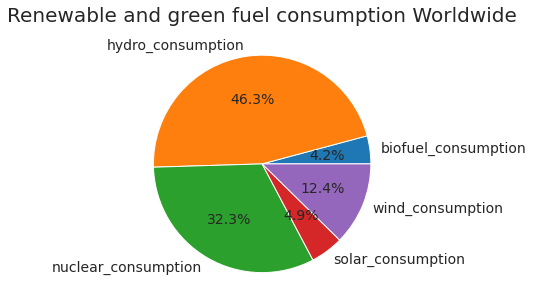

In [ ]:
energy_world_renewable=energy_data_df[["biofuel_consumption",'hydro_consumption','nuclear_consumption','solar_consumption','wind_consumption']].sum()
plt.pie(energy_world_renewable, labels= energy_world_renewable.index,autopct='%1.1f%%')
plt.title('Renewable and green fuel consumption Worldwide', fontsize = 20);

- Hydro and nuclear energy accounts for more than 75% of the renewable energy consumption worldwide. 

#### Q3: Find the number of countries having greater than average primary energy consumption? Is there any relation between population/GDP and primary energy consumption? 


In [ ]:
energy_data_copy=energy_data_df.copy()
energy_data_copy=energy_data_copy.groupby('country').mean()

energy_countries_above_avg=energy_data_copy[energy_data_copy.primary_energy_consumption>=energy_data_df.primary_energy_consumption.mean()]
display(energy_countries_above_avg.head(5))

energy_countries_below_avg=energy_data_copy[energy_data_copy.primary_energy_consumption<energy_data_df.primary_energy_consumption.mean()]
display(energy_countries_below_avg.head(5))

,year,population,gdp,biofuel_consumption,coal_consumption,energy_cons_change_pct,energy_per_capita,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,renewables_share_energy,solar_consumption,wind_consumption
country,,,,,,,,,,,,,,,,,,,
Argentina,2015.5,4.335312e+07,8.308591e+11,13.040417,13.601750,0.996667,21984.901750,827.199000,460.053417,79.824083,125.241833,19.287417,353.543833,5.078000,952.440750,105.954250,11.138917,0.991833,7.019750
Australia,2015.5,2.401839e+07,1.117180e+12,2.185083,526.735000,0.452000,66033.719750,1465.006833,371.942000,42.805667,118.422667,0.000000,566.329500,10.552500,1583.429667,118.422667,7.446000,27.025250,35.854583
Brazil,2015.5,2.058102e+08,3.010825e+12,198.625500,186.502083,1.784833,16478.042417,1867.103917,356.521417,1046.750167,1523.305500,39.555667,1324.080417,150.437750,3390.409417,1483.749833,43.784500,8.451917,79.484750
Canada,2015.5,3.603739e+07,1.540784e+12,21.133917,212.742167,0.361500,110000.901583,2556.641833,1081.174250,1025.723250,1403.006917,253.415250,1262.725250,33.088000,3959.649000,1149.591667,29.033750,7.348417,62.298167
China,2015.5,1.394065e+09,1.578983e+13,28.288500,22488.575083,4.080417,25858.336417,31483.705333,2256.794500,2848.052750,4625.125250,543.974417,6738.335833,232.387583,36108.831667,4081.151083,11.029000,275.275250,697.147083


,year,population,gdp,biofuel_consumption,coal_consumption,energy_cons_change_pct,energy_per_capita,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,renewables_share_energy,solar_consumption,wind_consumption
country,,,,,,,,,,,,,,,,,,,
Afghanistan,2015.5,3.414365e+07,6.118456e+10,NaN,NaN,3.81890,1166.254600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.1240,NaN,NaN,NaN,NaN
Albania,2015.0,2.885276e+06,3.025987e+10,NaN,NaN,0.50770,12263.212100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.4013,NaN,NaN,NaN,NaN
Algeria,2015.5,3.997519e+07,5.302844e+11,NaN,3.215833,3.67625,14727.870167,590.230583,370.060333,0.415,1.210833,0.0,216.954333,0.0,591.4415,1.210833,0.199167,0.7745,0.02125
American Samoa,2015.5,5.054808e+04,NaN,NaN,NaN,-4.29340,29985.338800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5481,NaN,NaN,NaN,NaN
Angola,2015.5,2.876146e+07,1.618622e+11,NaN,NaN,3.93520,3653.382200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.9257,NaN,NaN,NaN,NaN


In [ ]:
print("Number of countries above average {}\nNumber of countries below average {}\nPercentage of countries above average {:.2f}".format(len(energy_countries_above_avg),len(energy_countries_below_avg),len(energy_countries_above_avg)/len(energy_countries_below_avg)))

Number of countries above average 32
Number of countries below average 167
Percentage of countries above average 0.19


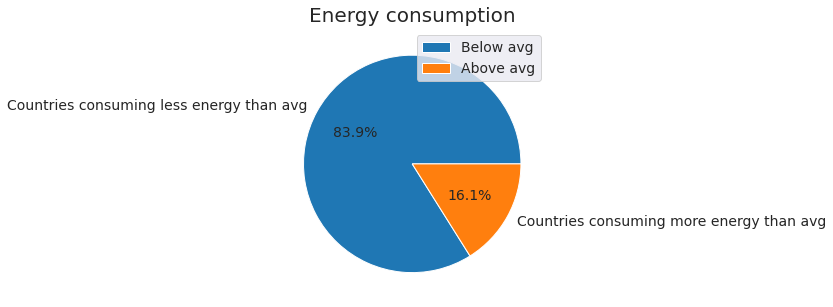

In [ ]:
plt.pie((energy_data_copy.primary_energy_consumption>=energy_data_df.primary_energy_consumption.mean()).value_counts(),labels=["Countries consuming less energy than avg","Countries consuming more energy than avg"],autopct='%1.1f%%')
plt.title('Energy consumption', fontsize = 20)
plt.legend(labels=['Below avg','Above avg'],loc='upper right');

In [ ]:
from scipy.stats.stats import pearsonr

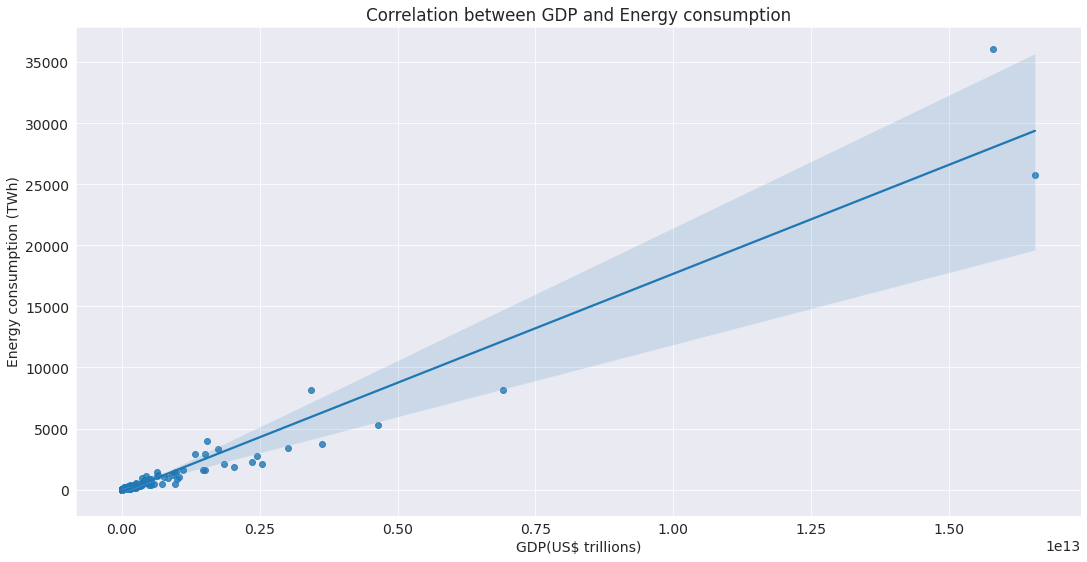

In [ ]:
plt.figure(figsize=(18,9))
fig=sns.regplot(x="gdp", y="primary_energy_consumption", data=energy_grouped)
fig.set(xlabel ="GDP(US$ trillions)", ylabel = "Energy consumption (TWh)", title ='Correlation between GDP and Energy consumption');

In [ ]:
pearsonr(energy_grouped.gdp, energy_grouped.primary_energy_consumption)

(0.9656256583712264, 6.018705849804618e-95)

- Correlation coefficient r=0.96 and p-value<0.05. Hence we can conclude there exists a strong correlation between gdp and primary energy consumption. 

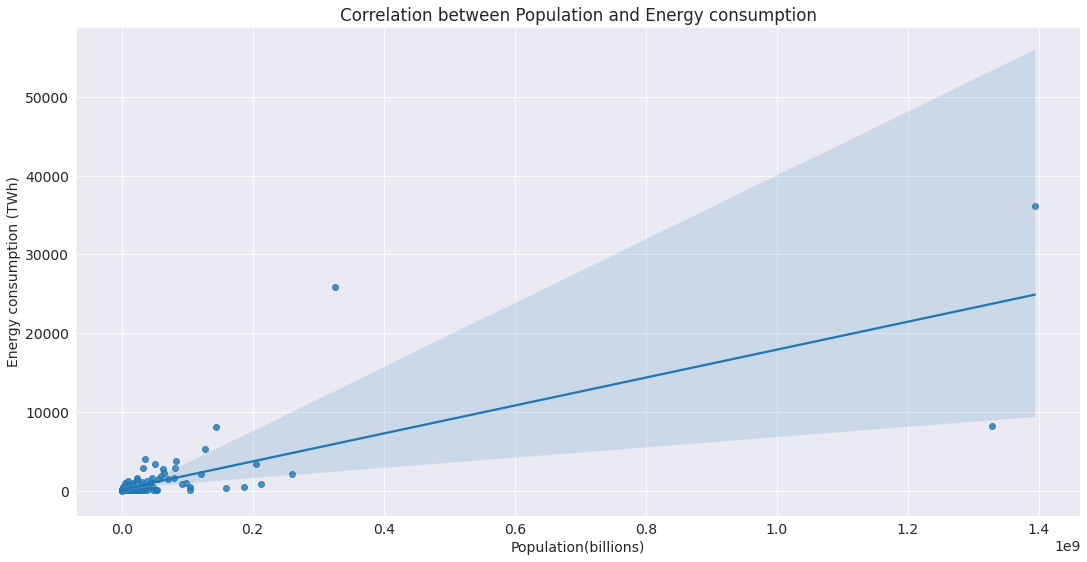

In [ ]:
plt.figure(figsize=(18,9))
fig=sns.regplot(x="population", y="primary_energy_consumption", data=energy_grouped)
fig.set(xlabel ="Population(billions)", ylabel = "Energy consumption (TWh)", title ='Correlation between Population and Energy consumption');

In [ ]:
pearsonr(energy_grouped.population, energy_grouped.primary_energy_consumption)

(0.760865786400111, 1.1338710107216163e-31)

- Correlation coefficient r=0.76 and p-value<0.05. Hence we can conclude there exists a strong correlation between gdp and primary energy consumption.

#### Q4: What is the reason for dip in energy consumption in 2020? Why did nuclear energy see a steep decline in 2011?


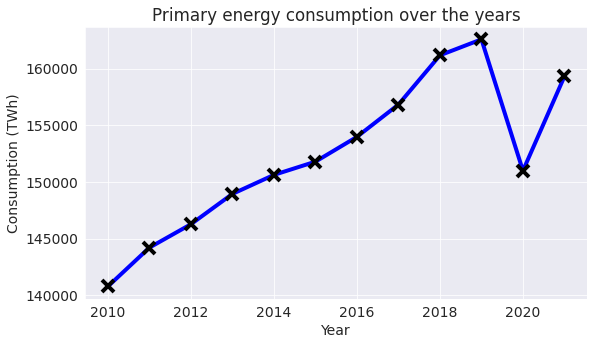

In [ ]:
plt.plot(energy_yearwise.index, energy_yearwise['primary_energy_consumption'], 'b-x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='black')
plt.title('Primary energy consumption over the years')
plt.xlabel('Year')
plt.ylabel('Consumption (TWh)');

- Due to the COVID-19 pandemic there were lockdowns all over the world and hence it is safe to assume that this disruption of operations led to a decrease in energy consumption. 

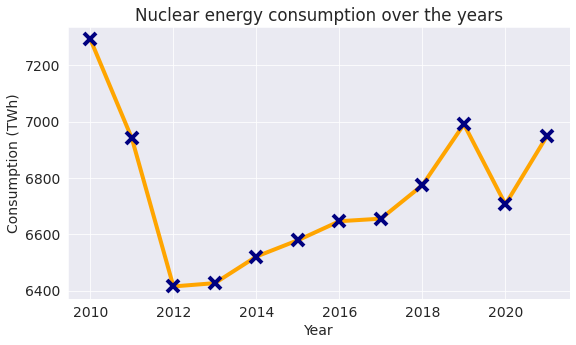

In [ ]:
plt.plot(nuc_energy_yearwise.index, nuc_energy_yearwise['nuclear_consumption'], color='orange',marker='x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')
plt.title('Nuclear energy consumption over the years')
plt.xlabel('Year')
plt.ylabel('Consumption (TWh)');

- Due to the [Fukushima nuclear power plant tragedy](https://www.bbc.com/news/world-asia-56252695) in 2011 many countries re-evaluated their stance on genertaing power using nuclear sources due the high risk involved in generating power from these soucres. 

#### Q5: Explore the energy consumption in India. 


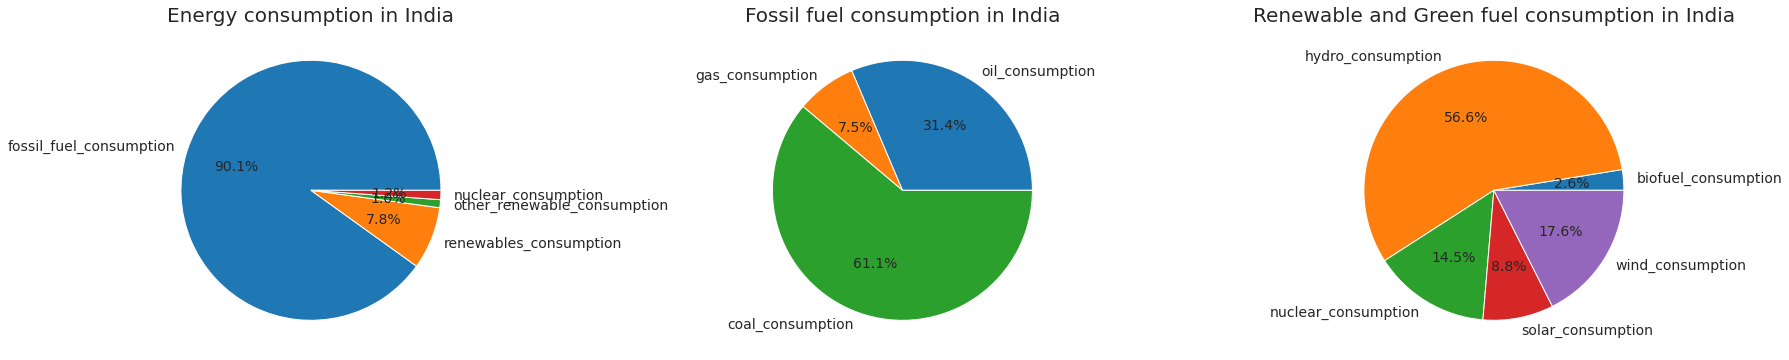

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
energy_india=energy_data_df[energy_data_df.country=="India"]

energy_india_overall=energy_india[['fossil_fuel_consumption','renewables_consumption','other_renewable_consumption','nuclear_consumption']].sum()

axes[0].pie(energy_india_overall,labels=energy_india_overall.index,autopct='%1.1f%%')
axes[0].set_title('Energy consumption in India', fontsize = 20);

energy_india_fossil=energy_india[["oil_consumption","gas_consumption","coal_consumption"]].sum()
axes[1].pie(energy_india_fossil,labels=energy_india_fossil.index,autopct='%1.1f%%')
axes[1].set_title('Fossil fuel consumption in India', fontsize = 20);

energy_india_renewable=energy_india[["biofuel_consumption",'hydro_consumption','nuclear_consumption','solar_consumption','wind_consumption']].sum()
axes[2].pie(energy_india_renewable, labels =energy_india_renewable.index,autopct='%1.1f%%')
axes[2].set_title('Renewable and Green fuel consumption in India', fontsize = 20);

plt.tight_layout(pad=0.5);

- Fossil fuels account for majority of the primary energy consumption in India.
- Coal being abundant in India is the biggest contributor among fossil fuel sources. 
- Hydro energy accounts for more than 50% of the renewable energy consumption.

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Inferences and Conclusion

- There has been an increase in the consumption of energy worldwide in the last couple of years. From the trend lines we observe that renewable sources are on the rise but we still pre-dominantly rely on non-renewable sources of energy. 
- China and USA have the highest energy consumption (and also have the highest GDP). Their energy consumption combined is more than the rest of the top 8 countries combined. 
- Nordic countries (Iceland, Norway, Sweden) have the highest percentage of renewable energy consumption.
- Hydro and nuclear energy account for majority of the renewable energy consumption worldwide.
- A strong positive correlation is found between the GDP/population and the primary energy consumption of the country. 
- The Covid-19 pandemic lockdowns led to disruption of operations across most sectors and this had a drastic impact on the energy consumption worldwide. 
- Countries are aversive to using nuclear energy due to the risk involved in it. Precautionary measures and stringent protocols need to be in place to avoid catastrophe. 
- India (like most other countries) still relies heavily on fossil fuels for meeting its energy demands.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## References and Future Work
**Future Work**
- Given the energy crisis in 2022, it would be interesting to analyse the trends in renewable energy consumption in the coming years. 
- The world GDP and population have also seen a shift post the pandemic, and this data could also be compelling and could be analysed to see where we are heading. 

**References** 
-  [Pandas user guide](https://pandas.pydata.org/docs/user_guide/index.html)
- [Matplotlib user guide](https://matplotlib.org/3.3.1/users/index.html)
- [Seaborn user guide & tutorial](https://seaborn.pydata.org/tutorial.html)
- [Data science tutorial](https://www.geeksforgeeks.org/data-science-tutorial/?ref=ghm)
- [Scraping Wikipedia using beautifulsoup ](https://medium.com/analytics-vidhya/scrape-data-from-wikipedia-using-python-beautifulsoup-and-pandas-library-in-few-steps-5cda49e4dfc1)

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
